#DATASET OVERVIEW

In [1]:
##Given a training sample of tweets and labels where label 1 denotes a negative tweet and label 0 denotes positive tweets
# Importing necessary packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#Looking at the training data set
Data=pd.read_csv("train.csv")
Data.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [2]:
#Characteristics in the data
Data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [3]:
#Information related to the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
#Looking at the tail of the data set
Data.tail()


,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


#DATA PRE-PROCESSING

In [5]:
#REMOVING THE UNWANTED SYMBOLS IN THE DATA SET
#For pattern matching importing Regular Expression package
import re

#writing a function for removing unwanted symbols
def symbol_remove(text,pattern):
  r=re.findall(pattern,text)
  
  for i in r:
    text=re.sub(i,"",text)
  return text
  

In [6]:
Data['Tidy_Tweets']=np.vectorize(symbol_remove)(Data['tweet'],"@[\w]*")
Data.head()

,id,label,tweet,Tidy_Tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


#REMOVING SPECIAL CHARACTERS

In [7]:
Data["Tidy_Tweets"]=Data["Tidy_Tweets"].str.replace("[^a-zA-Z#]"," ")

Data.head(20)

,id,label,tweet,Tidy_Tweets
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [ ]:
Data_dup=Data.copy()

In [8]:
#Removing Short Words
Data['Tidy_Tweets'] = Data['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Data.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here


#TOKENIZATION

<font color='red'>Tokenization:: It is the process of breaking a stream of text into words,phrases,symbols ,other meaningful symbols which are implied as tokens.
Here we tokenize our sentences because we will apply Stemming from the “NLTK” package </font>
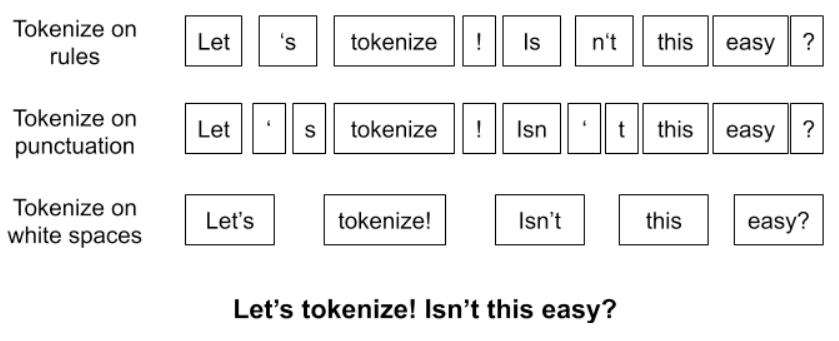

In [9]:
tokenized_tweet = Data['Tidy_Tweets'].apply(lambda x: x.split())

tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

#STEMMING

<font color='hotpink'>Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP). </font>
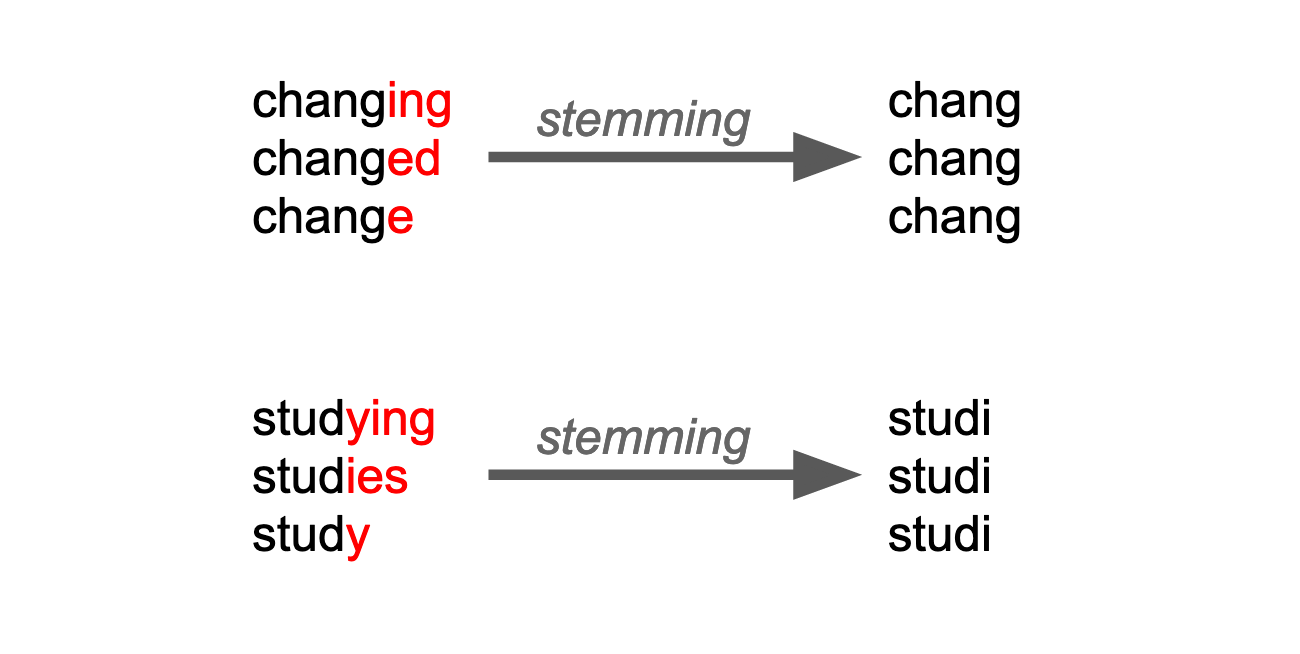



In [10]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [11]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

Data['Tidy_Tweets'] = tokenized_tweet
Data.head()

,id,label,tweet,Tidy_Tweets
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


#DATA VISUALIZATION

<font color="SlateBlue">Data visualization is the graphical representation of information and data.
 By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.</font>


#WORD CLOUDS

<font color='MediumSeaGreen'>Word clouds work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

<font color='MediumSeaGreen'>A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is. </font>

Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two. </font>

In [13]:
#The most frequent words appear large in size and less frequent words appear small .
# Importing necessary packages 

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [16]:
all_words_positive = ' '.join(text for text in Data['Tidy_Tweets'][Data['label']==0])

In [17]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='red', height=1500, width=4000,mask=Mask).generate(all_words_positive)

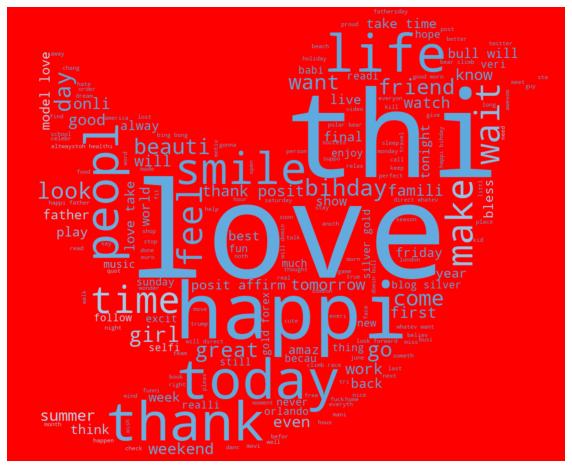

In [18]:
plt.figure(figsize=(10,20))
 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [19]:
all_words_negative = ' '.join(text for text in Data['Tidy_Tweets'][Data['label']==1])


In [20]:
#Generating WordCloud
#Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))


image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color='grey', height=1500, width=4000,mask=Mask).generate(all_words_negative)


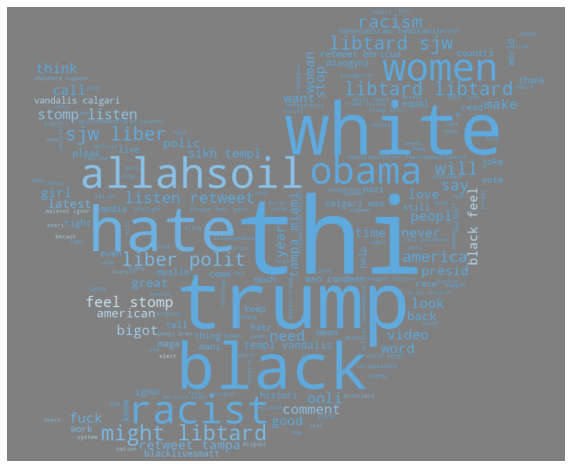

In [21]:
plt.figure(figsize=(10,20))


plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()
#It shows all the negative characters that are present in our data set

#EXTRACTING HASHTAGS

In [22]:
#Hashtags play a crucial role in developing interest in your social media accounts and are used on a number of social media platforms, most commonly,Twitter and Instagram.
#Including a hashtag with your posts helps to categorize content for your audience.
def Hashtags(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [23]:
#positive hashtags

pos_has = Hashtags(Data['Tidy_Tweets'][Data['label']==0])

pos_has

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [24]:
ht_positive_unnest = sum(pos_has,[])
ht_positive_unnest


['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [25]:
#Negative hashtags

neg_has = Hashtags(Data['Tidy_Tweets'][Data['label']==1])

neg_has

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [26]:
ht_negative_unnest = sum(neg_has,[])
ht_negative_unnest

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [27]:
pos_freq_count=nltk.FreqDist(ht_positive_unnest)

pos_freq_count

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

# DATA FRAME FOR POSITIVE TWEETS

In [28]:
df_positive = pd.DataFrame({'Hashtags':list(pos_freq_count.keys()),'Count':list(pos_freq_count.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


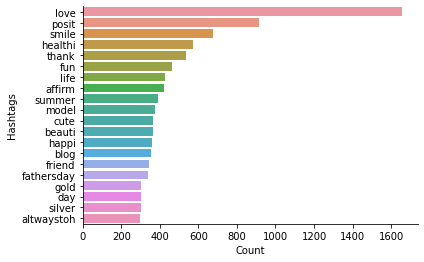

In [29]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

#DATA FRAME FOR NEGATIVE TWEETS


In [30]:
neg_freq_count = nltk.FreqDist(ht_negative_unnest)

neg_freq_count

FreqDist({'cnn': 10,
          'michigan': 2,
          'tcot': 14,
          'australia': 6,
          'opkillingbay': 5,
          'seashepherd': 22,
          'helpcovedolphin': 3,
          'thecov': 4,
          'neverump': 8,
          'xenophobia': 12,
          'love': 11,
          'peac': 8,
          'race': 14,
          'ident': 1,
          'med': 1,
          'altright': 18,
          'whitesupremaci': 6,
          'linguist': 1,
          'power': 2,
          'raciolinguist': 1,
          'brexit': 27,
          'peopl': 11,
          'trump': 136,
          'republican': 13,
          'michelleobama': 8,
          'knick': 1,
          'golf': 1,
          'jewishsupremacist': 1,
          'libtard': 77,
          'sjw': 75,
          'liber': 81,
          'polit': 95,
          'trash': 1,
          'hate': 37,
          'stereotyp': 4,
          'prejudic': 3,
          'hope': 5,
          'conflict': 1,
          'pol': 1,
          'bluelivesmatt': 3,
          

In [31]:
df_negative = pd.DataFrame({'Hashtags':list(neg_freq_count.keys()),'Count':list(neg_freq_count.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


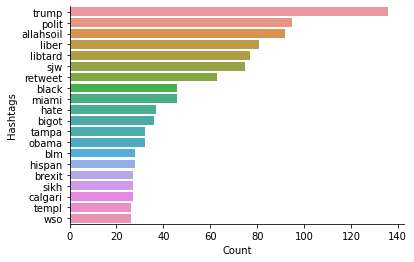

In [32]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

#BAG-OF-WORDS





<font color='DarkCyan'>A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms
A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things....
1. A vocabulary of known words.
2. A measure of the presence of known words
</font>

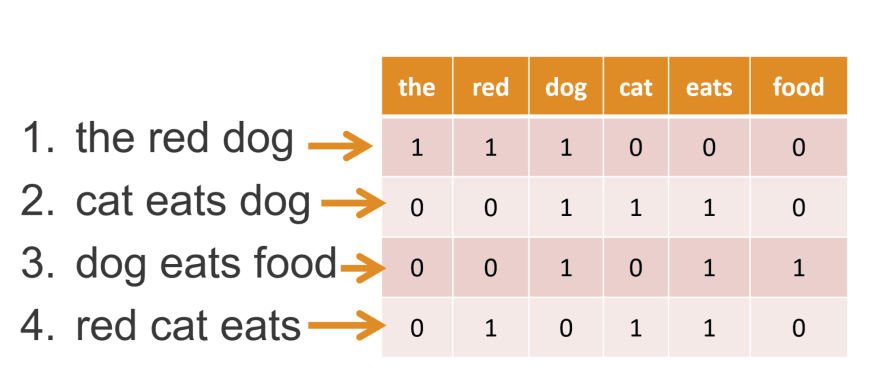

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(Data['Tidy_Tweets'])

df_bow = pd.DataFrame(bow.todense())

df_bow.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
31957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#TF-IDF PROCESSING

<font color='DarkMagenta'>TF-IDF(term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.
TF-IDF for a word in a document is calculated by multiplying two different metrics:    
1. The term frequency of a word in a document
2.The inverse document frequency
</font>

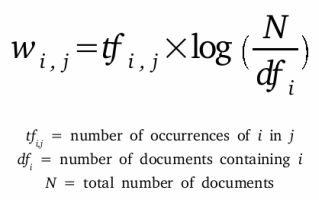


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(Data['Tidy_Tweets'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#SPLITTING DATA TO TRAINING-VALIDATION

In [37]:
#By using Bag-Of-Words Features
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [38]:
#By using TF-IDF features
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
#Bag-Of-Words features
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,Data['label'],test_size=0.3,random_state=2)

In [43]:
#TF-IDF FEATURES
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,Data['label'],test_size=0.3,random_state=17)

#APPLYING MACHINE LEARNING MODELS


#**LOGISTIC REGRESSION MODEL**

<font color='DarkRed'>Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.</font>
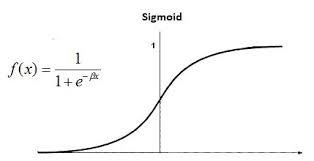

In [46]:
from sklearn.metrics import f1_score

In [47]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

# BAG-OFWORDS FEATURE : FITTING LOGIISTIC REGRESSION

In [48]:
Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#Predicting weather a tweet falls into positive category or negative category with the help of probabilities
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.86496142e-01, 1.35038585e-02],
       [9.99589805e-01, 4.10194881e-04],
       [9.17364248e-01, 8.26357524e-02],
       ...,
       [8.50133934e-01, 1.49866066e-01],
       [9.58035269e-01, 4.19647306e-02],
       [9.67636516e-01, 3.23634839e-02]])

*CALCULATING F1-SCORE*

In [50]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5603305785123968

## TF-IDF FEATURE : FITTING LOGIISTIC REGRESSION

In [51]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98495798, 0.01504202],
       [0.97998512, 0.02001488],
       [0.94121193, 0.05878807],
       ...,
       [0.98670458, 0.01329542],
       [0.97126857, 0.02873143],
       [0.99046732, 0.00953268]])

*CALCULATING F1 SCORE*

In [54]:

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5945017182130584

#**DECISION TREE MODEL**

<font color='Lime'>Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node holds a class label.</font>
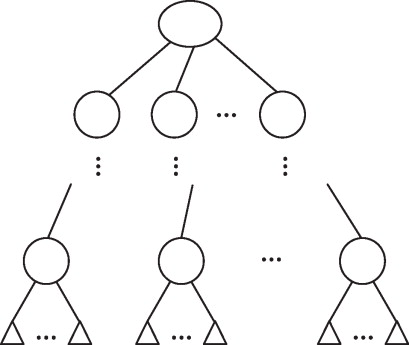

 



In [56]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

#BAG-OF-WORDS FEATURES: FITTING DECISION TREE MODEL

In [57]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [58]:
#Predicting the probabilities.
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

*CALCULATING F1 SCORE*

In [ ]:

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# Calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

#TF-IDF FEATURES: FITTING DECISION TREE MODEL

In [64]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [65]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

*CALCULATING F1 SCORE*

In [66]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5522620904836193

#**MODEL COMPARISION**





#BAG-OF-WORDS

In [67]:

Algo_1 = ['LogisticRegression(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow,dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,3)])

compare_1.T

,1,2
Model,LogisticRegression(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.560331,0.5


#COMPARISION GRAPH

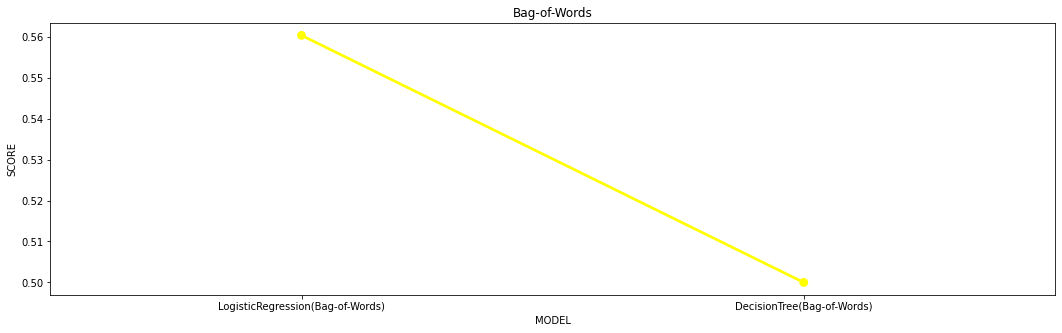

In [73]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1,color="yellow")

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

#TF-IDF

In [70]:
Algo_2 = ['LogisticRegression(TF-IDF)','DecisionTree(TF-IDF)']

score_2 = [log_tfidf,dct_score_tfidf]

compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,3)])

compare_2.T

,1,2
Model,LogisticRegression(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.594502,0.552262


#COMPARISION GRAPH

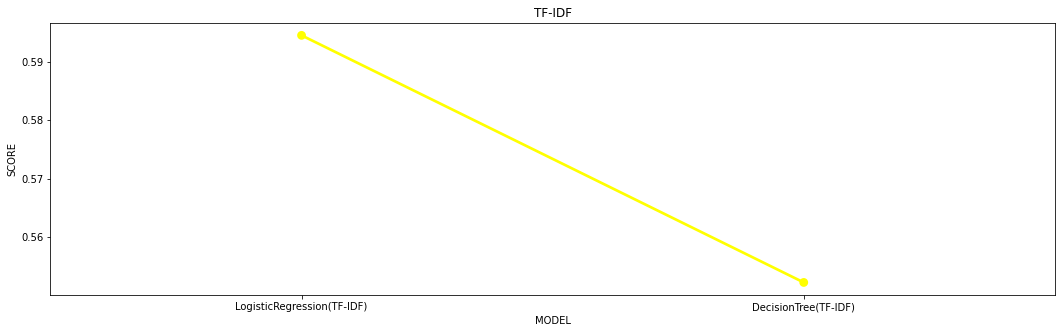

In [72]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2,color='yellow')

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

#LOGISTIC REGRESSION(TF-IDF vs BAG-OF-WORDS)

In [74]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

score_best = [log_bow,log_tfidf]

compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

compare_best.T

,1,2
Model,LogisticRegression(Bag-of-Words),LogisticRegression(TF-IDF)
F1_Score,0.560331,0.594502


#COMPARISION GRAPH

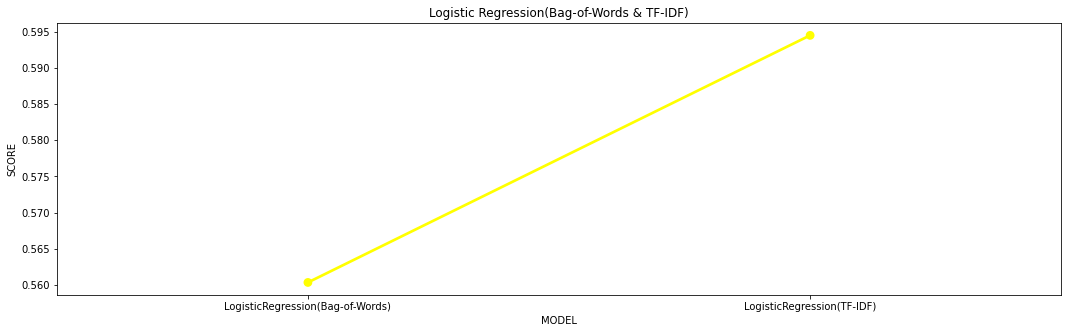

In [75]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best,color="yellow")

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

#PREDICTING RESULTS


In [80]:
Data1=Data.copy()
sub=Data1[["id","label"]]
sub.to_csv('copy.csv',index=False)

In [82]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
combine = train.append(test,ignore_index=True,sort=True)

In [85]:
test_tfidf = tfidf_matrix[14765:]
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','label']]
submission.to_csv('result.csv', index=False)

In [88]:
res = pd.read_csv('result.csv')
res

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,0
17193,49156,0
17194,49157,0
17195,49158,1
